# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('movies_initial.csv')
X = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, 3:4].values
dataset.head(5)
# dataset.iloc[:, 1:-1]

,imdbID,title,year,runtime,genre,released,director,writer,cast,metacritic,...,awards,lastupdated,type,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,Carmencita,1894,1.0,"Documentary, Short",NaN,William K.L. Dickson,NaN,Carmencita,NaN,...,NaN,2015-08-26 00:03:45.040000000,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,Blacksmith Scene,1893,1.0,Short,1893-05-09,William K.L. Dickson,NaN,"Charles Kayser, John Ott",NaN,...,1 win.,2015-08-26 00:03:50.133000000,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Pauvre Pierrot,1892,4.0,"Animation, Comedy, Short",1892-10-28,�mile Reynaud,NaN,NaN,NaN,...,NaN,2015-08-12 00:06:02.720000000,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Edison Kinetoscopic Record of a Sneeze,1894,1.0,"Documentary, Short",1894-01-09,William K.L. Dickson,NaN,Fred Ott,NaN,...,NaN,2015-08-10 00:21:07.127000000,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,Employees Leaving the Lumi�re Factory,1895,1.0,"Documentary, Short",1895-03-22,Louis Lumi�re,NaN,NaN,NaN,...,NaN,2015-08-26 00:03:56.603000000,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[0.01626016, 0.        ],
       [0.00813008, 0.        ],
       [0.        , 0.00357569],
       ...,
       [0.69105691, 0.09892729],
       [0.69105691, 0.08939213],
       [0.69105691, 0.09177592]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 2, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

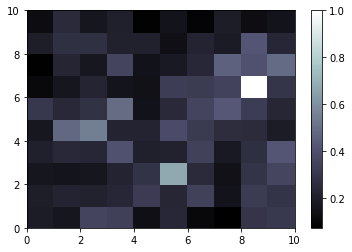

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

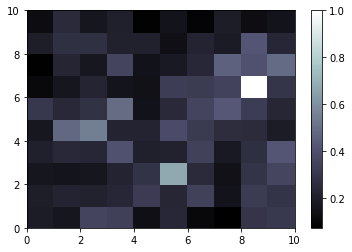

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    if isinstance(y[i], int):
        w = som.winner(x)
        plot(w[0] + 0.5,
             w[1] + 0.5,
             markers[y[i]],
             markeredgecolor = colors[y[i]],
             markerfacecolor = 'None',
             markersize = 10,
             markeredgewidth = 2)
show()

In [7]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,0)], mappings[(0,0)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

1916.0
1916.0
1916.0
1916.0
1916.0
1917.0
1933.0
1933.0
1941.0
1942.0
1943.0
1947.0
1948.0
1950.0
1950.0
1951.0
1953.0
1951.0
1952.0
1955.0
1952.0
1953.0
1953.0
1953.0
1955.0
1954.0
1954.0
1954.0
1955.0
1955.0
1955.0
1955.0
1955.0
1956.0
1955.0
1957.0
1956.0
1957.0
1958.0
1956.0
1958.0
1958.0
1958.0
1958.0
1958.0
1959.0
1959.0
1959.0
1959.0
1959.0
1960.0
1959.0
1961.0
1961.0
1961.0
1963.0
1962.0
1962.0
1963.0
1961.0
1965.0
1964.0
1965.0
1965.0
1966.0
1965.0
1965.0
1966.0
1966.0
1965.0
1966.0
1966.0
1966.0
1966.0
1966.0
1967.0
1967.0
1967.0
1967.9999999999998
1967.0
1967.9999999999998
1967.9999999999998
1967.9999999999998
1967.9999999999998
1967.9999999999998
1967.9999999999998
1967.9999999999998
1969.0000000000002
1967.9999999999998
1971.0000000000002
1969.0000000000002
1969.0000000000002
1989.9999999999998
1969.0000000000002
1970.0000000000002
1970.0000000000002
1971.0000000000002
1970.0000000000002
1969.0000000000002
1974.0
1971.0000000000002
1971.0000000000002
1971.0000000000002
197